In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from xgboost import XGBRegressor

In [2]:
big_mart_d = pd.read_csv(r"D:\Python\ML projects\10. Big Mart SAles\Train.csv")

In [3]:
big_mart_d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart_d.shape

(8523, 12)

In [5]:
big_mart_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
big_mart_d.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Categorical Features:

1. Iten Indentifier
2. Item Fat Content
3. Item Type
4. Outlet Identifier
5. Outlet Size
6. Outlet Location Type
7. Outlet Type

#### Handling Missing Values:

Mean = Average Value  
Mode = Most repeated values

In [7]:
# mean value of item weight

big_mart_d['Item_Weight'].mean()

12.857645184136183

In [8]:
# filling with mean value

big_mart_d['Item_Weight'].fillna(big_mart_d['Item_Weight'].mean(), inplace=True)

In [9]:
big_mart_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# replacing the missing vlaues in Outlet size with mode

mode_outlet_size = big_mart_d.pivot_table(values='Outlet_Size', columns='Outlet_Type', 
                                          aggfunc=(lambda x:x.mode()[0]))

In [11]:
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
missing_values = big_mart_d['Outlet_Size'].isnull()

In [13]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [14]:
big_mart_d.loc[missing_values, 'Outlet_Size'] = big_mart_d.loc[missing_values, 'Outlet_Type'].apply(lambda y:mode_outlet_size[y])

In [15]:
big_mart_d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
big_mart_d.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis

In [17]:
big_mart_d.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
# AESTHETICS

sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


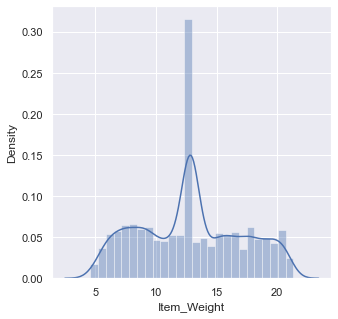

In [19]:
# item weight distr.

plt.figure(figsize=(5,5))
sns.distplot(big_mart_d['Item_Weight'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


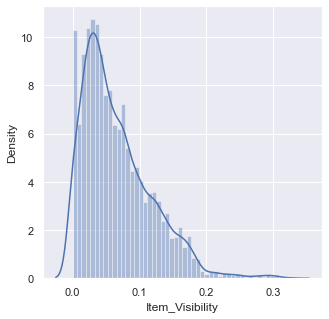

In [20]:
# item visibility distr.

plt.figure(figsize=(5,5))
sns.distplot(big_mart_d['Item_Visibility'])
plt.show()

# right-skewed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


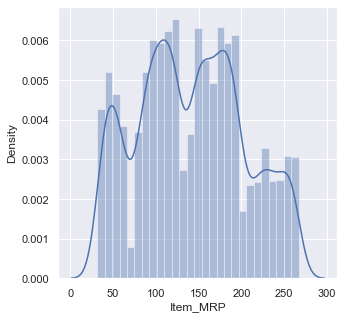

In [21]:
# item mrp distr.

plt.figure(figsize=(5,5))
sns.distplot(big_mart_d['Item_MRP'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


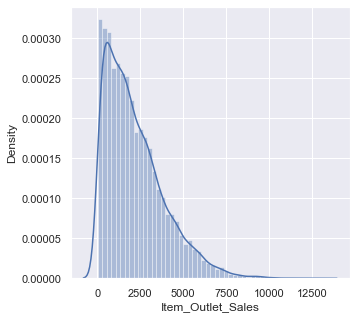

In [22]:
# item outlet sales distr.

plt.figure(figsize=(5,5))
sns.distplot(big_mart_d['Item_Outlet_Sales'])
plt.show()

# right-skewed

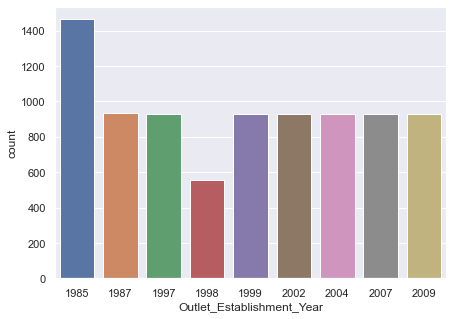

In [23]:
# outlet establishment distr.

plt.figure(figsize=(7,5))
sns.countplot(x='Outlet_Establishment_Year', data = big_mart_d)
plt.show()

In [24]:
big_mart_d['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

#### Categorical Features:

1. Iten Indentifier       (Exclude)
2. Item Fat Content
3. Item Type
4. Outlet Identifier      (exclude)  
5. Outlet Size
6. Outlet Location Type
7. Outlet Type

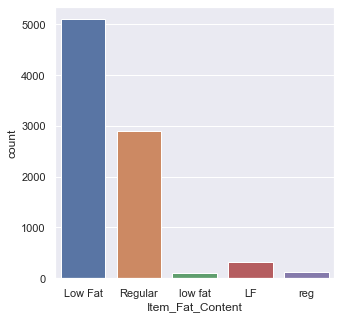

In [25]:
# item fat content

plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data = big_mart_d)
plt.show()

# later concatenate all the similar parts like LF, lowfat

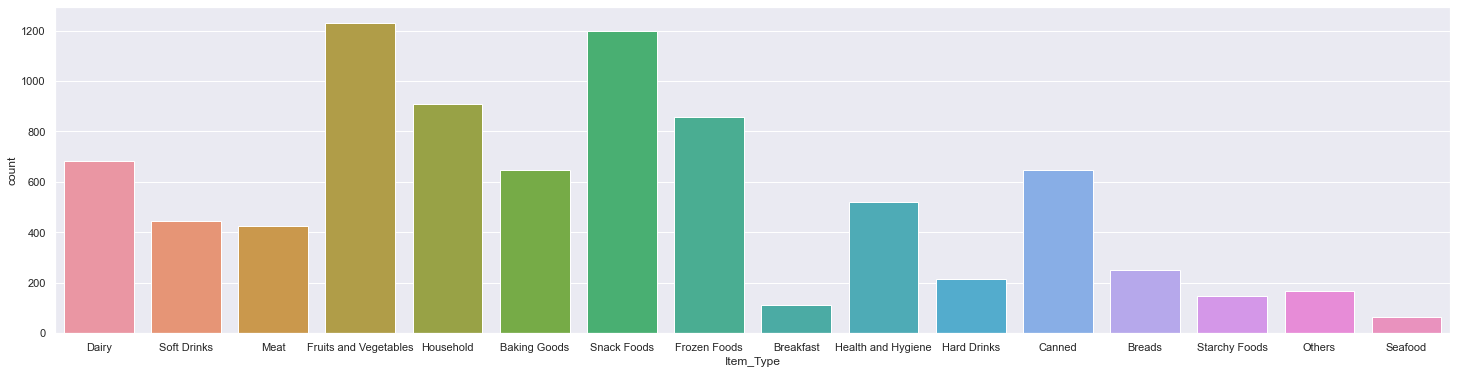

In [26]:
# Item type

plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data = big_mart_d)
plt.show()

In [27]:
big_mart_d['Outlet_Size']

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

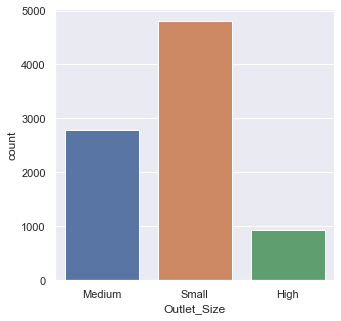

In [28]:
# Outlet Size

plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data = big_mart_d)
plt.show()

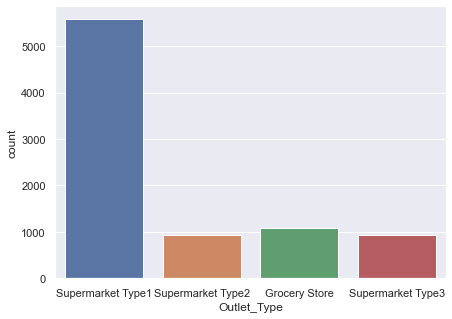

In [29]:
# Outlet Type

plt.figure(figsize=(7,5))
sns.countplot(x='Outlet_Type', data = big_mart_d)
plt.show()

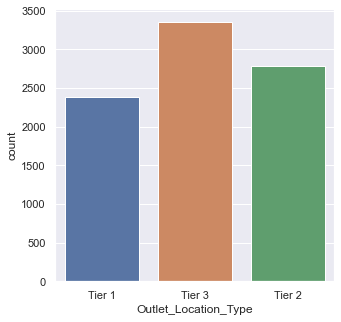

In [30]:
# Outlet Size

plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Location_Type', data = big_mart_d)
plt.show()

In [31]:
big_mart_d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
# Aggregating Fat content values

big_mart_d.replace({'Item_Fat_Content':{'low fat':'LF','Low Fat':'LF','reg':'Regular'}})


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,LF,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,LF,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### Label Encoding for categorical values

In [33]:
encoder = LabelEncoder()

In [34]:
big_mart_d['Item_Identifier'] = encoder.fit_transform(big_mart_d['Item_Identifier'])

big_mart_d['Item_Fat_Content'] = encoder.fit_transform(big_mart_d['Item_Fat_Content'])

big_mart_d['Item_Type'] = encoder.fit_transform(big_mart_d['Item_Type'])

big_mart_d['Outlet_Identifier'] = encoder.fit_transform(big_mart_d['Outlet_Identifier'])

big_mart_d['Outlet_Location_Type'] = encoder.fit_transform(big_mart_d['Outlet_Location_Type'])

big_mart_d['Outlet_Size'] = encoder.fit_transform(big_mart_d['Outlet_Size'])

big_mart_d['Outlet_Type'] = encoder.fit_transform(big_mart_d['Outlet_Type'])

In [35]:
big_mart_d.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [47]:
x = big_mart_d.drop(columns=['Item_Outlet_Sales'], axis=1)
y = big_mart_d['Item_Outlet_Sales']

In [48]:
model = XGBRegressor()

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [50]:
print(x_train,y_train)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
1945             1316    18.350000                 0         0.089345   
1720             1320    17.350000                 1         0.168065   
1954              621    10.100000                 2         0.053887   
1919              801    10.850000                 1         0.162904   
2461              383     7.170000                 2         0.059717   
...               ...          ...               ...              ...   
2895              634    12.857645                 2         0.277459   
7813             1048    12.857645                 1         0.178193   
905              1130    17.850000                 0         0.065810   
5192             1425     9.600000                 1         0.049618   
235               126    12.857645                 1         0.043574   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
1945          9  191.9504                  3    

In [51]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
train_predict = model.predict(x_train)

r2_error_train = metrics.r2_score(y_train,train_predict)

In [53]:
print(r2_error_train)

0.8600576630588717


In [54]:
test_predict = model.predict(x_test)

r2_error_test = metrics.r2_score(y_test,test_predict)

In [55]:
print(r2_error_test)

0.5351028102772304


In [56]:
mean_absolute_error_test = metrics.mean_absolute_error(y_test,test_predict)

In [57]:
print(mean_absolute_error_test)

826.6505241382138


In [58]:
mean_absolute_error_train = metrics.mean_absolute_error(y_train,train_predict)
print(mean_absolute_error_train)

458.7716420750349
